# Behavioral Analytics for Detecting Anomalies in Financial Transaction
 Chosen Dataset: https://drive.google.com/file/d/1ZIjmAjPccvy16mOk7nrPtWe-_3rRP5zy/view?usp=sharing

With this model:
1. Keep up with fast evolving technological threats and better prevent the loss of funds (profit) to fraudsters.
2. Accurately detect and identify anomalies in
\\managing online transactions done on its platforms which may go undetected using traditional rules-based methods.
3. Improve quality assurance thus retaining old customers and acquire new ones. This will increase credit/profit base.
4. Improve its policy and decision making.

In [ ]:
#import the libaries to work with for EDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#loading the data set
data = pd.read_csv('./Online Payment Fraud Detection.csv',encoding='unicode-escape')

# Understanding the Data

In [ ]:
# Checking the size of the dataset (Rows,Columns)
data.shape

(15582, 10)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
15577,8,PAYMENT,3578.14,C1906187302,7640.0,4061.86,M636094317,0.0,0.0,0.0
15578,8,PAYMENT,7788.21,C1440655780,101154.0,93365.79,M1583961850,0.0,0.0,0.0
15579,8,PAYMENT,15247.04,C1603739197,7047.0,0.00,M708029389,0.0,0.0,0.0
15580,8,PAYMENT,14974.57,C167818406,2007.0,0.00,M508231066,0.0,0.0,0.0
15581,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset contains transactions that happened within 3days:20hours

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,15582.000000,1.558100e+04,1.558100e+04,1.558100e+04,1.558100e+04,1.558100e+04,15581.000000
mean,5.290977,1.146274e+05,7.349575e+05,7.502818e+05,8.167635e+05,1.143601e+06,0.005070
std,2.496962,2.827234e+05,1.940267e+06,1.982064e+06,2.496825e+06,3.142620e+06,0.071027
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.000000,4.728770e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,7.000000,1.325912e+04,2.005200e+04,7.077270e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.257745e+05,1.231220e+05,1.165282e+05,2.498820e+05,2.907726e+05,0.000000
max,8.000000,1.000000e+07,1.290000e+07,1.300000e+07,2.090000e+07,2.530000e+07,1.000000


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15582 entries, 0 to 15581
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            15582 non-null  int64  
 1   type            15581 non-null  object 
 2   amount          15581 non-null  float64
 3   nameOrig        15581 non-null  object 
 4   oldbalanceOrg   15581 non-null  float64
 5   newbalanceOrig  15581 non-null  float64
 6   nameDest        15581 non-null  object 
 7   oldbalanceDest  15581 non-null  float64
 8   newbalanceDest  15581 non-null  float64
 9   isFraud         15581 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
dtype: object

In [ ]:
#check for missing Data using isna().sum()

data.isna().sum()

step              0
type              1
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

No Missing Data

## Relationships and Insights

![https://th.bing.com/th/id/OIP.HgLmxNEHZnbeVAXWNzgv8AHaHa?pid=ImgDet&rs=1](attachment:image.png)

Exploring Relationships and insights in the dataset to answer unique business questions and gain more insights

In [ ]:
#Checking which recipients stand out

data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M708029389',
       'M508231066', nan], dtype=object)

In [ ]:
#Investigating to check unique customers
data.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1603739197',
       'C167818406', nan], dtype=object)

In [ ]:
#investigating to see how many times a customer started a transaction
data.nameOrig.value_counts()

C1231006815    1
C1282295280    1
C1944146560    1
C1116730904    1
C177776757     1
              ..
C856901180     1
C392377326     1
C829239469     1
C819323772     1
C167818406     1
Name: nameOrig, Length: 15581, dtype: int64

In [ ]:
#How many times a recipient got a transaction
data.nameDest.value_counts()

C985934102     65
C1286084959    55
C1590550415    54
C2083562754    48
C977993101     48
               ..
C1869400026     1
M1974325564     1
M1158484171     1
M6987253        1
M508231066      1
Name: nameDest, Length: 10430, dtype: int64

In [ ]:
data.amount.max()

10000000.0

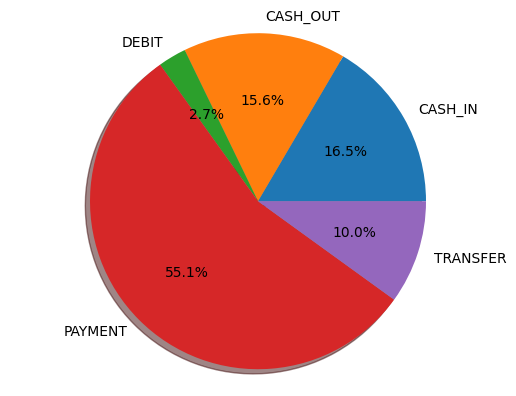

In [ ]:
#Checking the distribution of the type of transactions made

labels = data['type'].astype('category').cat.categories.tolist()
counts = data['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
#Investigating how many times a particular type of transaction was carried out.

data.type.value_counts()

PAYMENT     8590
CASH_IN     2578
CASH_OUT    2438
TRANSFER    1553
DEBIT        422
Name: type, dtype: int64

In [ ]:
#Investigating the top customers and the type of transactions they initiated
top_ten = data.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

nameOrig
C2047727228    TRANSFER
C1364127192    TRANSFER
C1185083442    TRANSFER
C510868405     TRANSFER
C1665846986    TRANSFER
C136312946     TRANSFER
C1989968081    TRANSFER
C1363800072    TRANSFER
C251666609     TRANSFER
C509532371     TRANSFER
Name: type, dtype: object

In [ ]:
#Checking the average amounttransacted
data['amount'].mean()

114627.38303382327

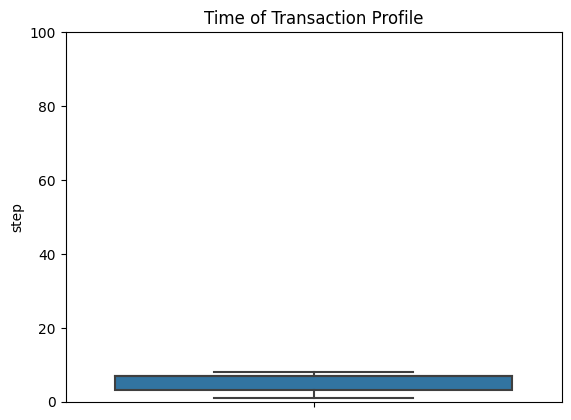

In [ ]:
sns.boxplot(y=data.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

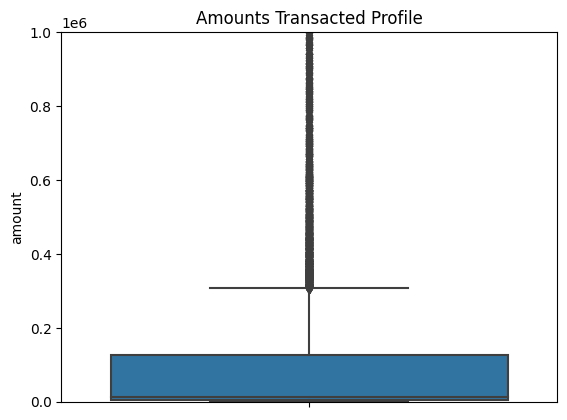

In [ ]:
sns.boxplot(y=data.amount)
plt.title('Amounts Transacted Profile')
plt.ylim(0,1000000)
plt.show()

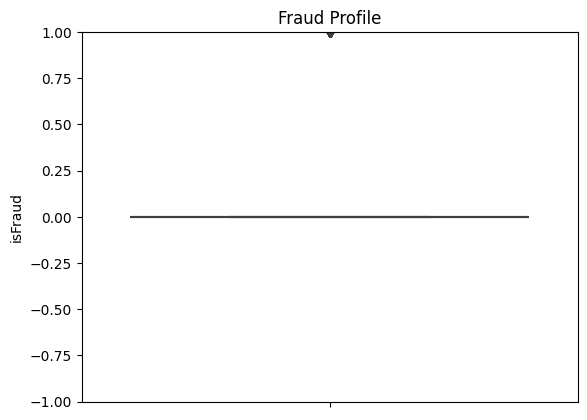

In [ ]:
sns.boxplot(y=data.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

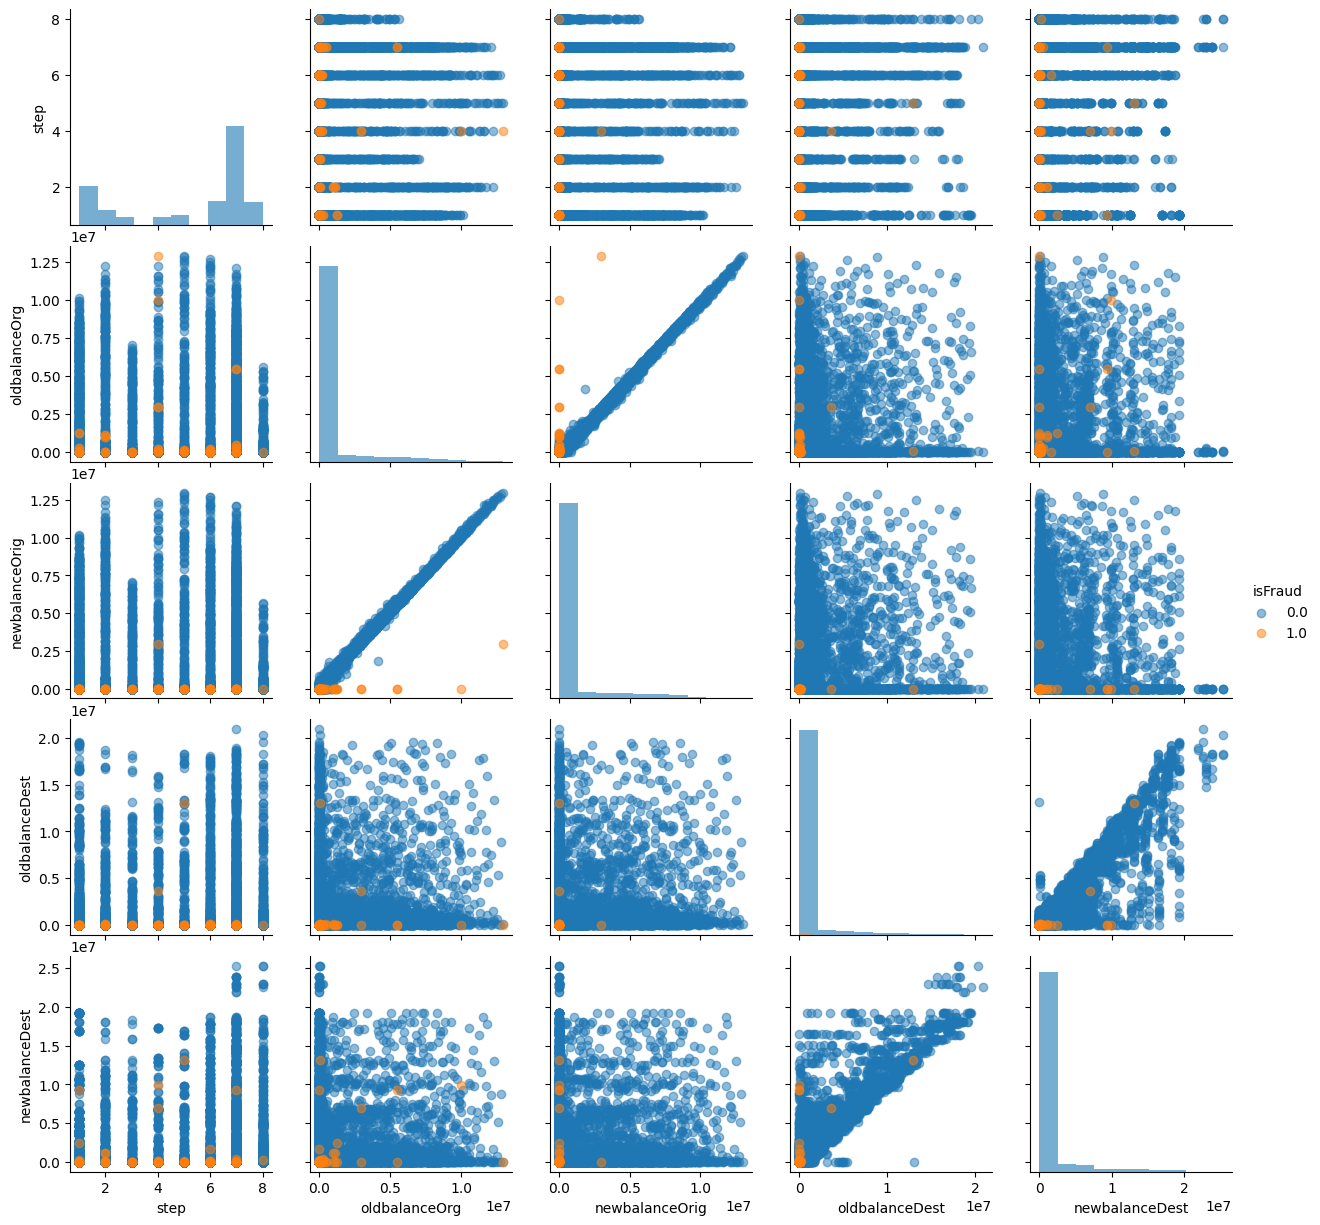

In [ ]:
#Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(data, vars = ['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

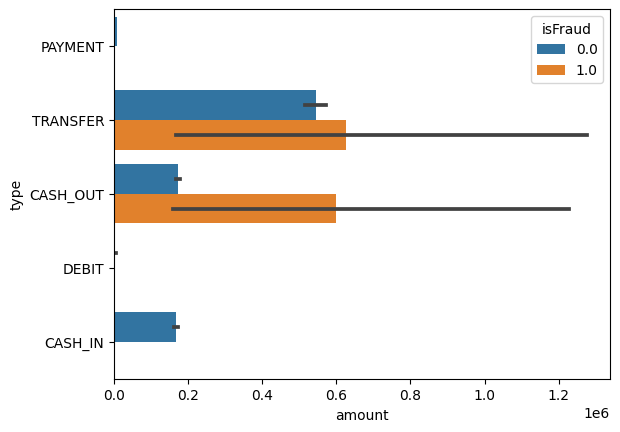

In [ ]:
sns.barplot(x='amount', y='type', hue= 'isFraud', data=data)
plt.show()

(0.0, 2000000.0)

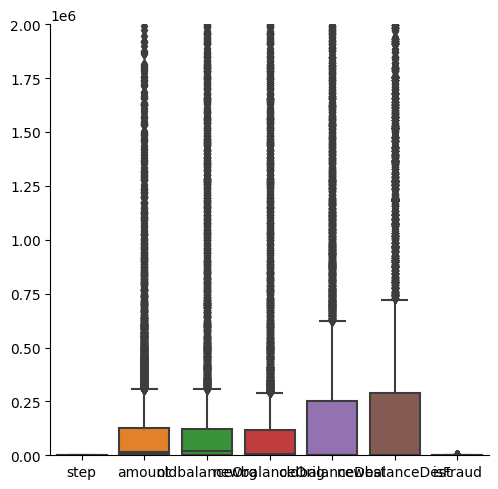

In [ ]:

sns.catplot(data=data,kind='box')

plt.ylim(0,2000000)

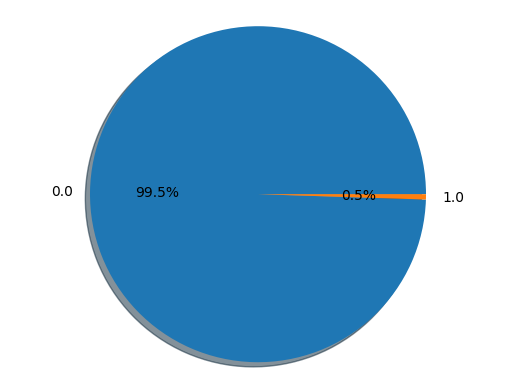

In [ ]:
# Fraud Distribution

labels = data['isFraud'].astype('category').cat.categories.tolist()
counts = data['isFraud'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
# Sepearating Fraudulent transaction from non fraudulent

Fraudulent_Transaction = data[data.isFraud ==1]
Not_Fraudulent_Transaction = data[data.isFraud ==0]

In [ ]:
print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))


Fraudulent Transaction: 79
Not Fraudulent Transaction: 15502


The dataset shows heavy 'Class-imbalance'

In [ ]:
#Understanding The statistical nature of Non Fraudulent Transactions.

Not_Fraudulent_Transaction.amount.describe()

count    1.550200e+04
mean     1.120928e+05
std      2.501373e+05
min      2.390000e+00
25%      4.705065e+03
50%      1.310306e+04
75%      1.254374e+05
max      3.776389e+06
Name: amount, dtype: float64

In [ ]:
#Understanding The statistical nature of Fraudulent Transactions.

Fraudulent_Transaction.amount.describe()

count    7.900000e+01
mean     6.119884e+05
std      1.811041e+06
min      1.640000e+02
25%      1.609792e+04
50%      2.676850e+04
75%      2.164220e+05
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
#Comparing both class of transactions
data.groupby('isFraud').mean()

<ipython-input-40-c11441d0a0d6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('isFraud').mean()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0.0,5.295962,112092.773483,735443.940212,753916.242320,819797.091016,1.145742e+06
1.0,4.278481,611988.361013,639506.424304,37093.904304,221496.225063,7.236240e+05


# Undersampling


Building a sample dataset containing similar distribution of Non Fraudulent transactions and Fraudulent transactions. This rectifies the class-imbalance and helps our machine learning model to perform better predictions.

Since we want to build a model that detects Fraud, we base our sampling on the number of transactions classed as fraudulent in our original dataset.

Fraudulent transactions: 1142

In [ ]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

Joining the two dataframes

In [ ]:
new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [ ]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2511,1,CASH_IN,72984.81,C292856581,2615355.34,2688340.14,C564160838,1254956.07,1070702.75,0.0
7496,7,CASH_IN,314929.23,C2076021838,5007.00,319936.23,C1531812826,14945.52,0.00,0.0
13735,7,TRANSFER,357663.13,C1936728619,19048.28,0.00,C1643855278,9110751.15,9680855.68,0.0
10264,7,CASH_OUT,455406.52,C613652899,0.00,0.00,C716083600,1995598.25,7382990.50,0.0
9189,7,PAYMENT,14065.07,C217590872,28535.00,14469.93,M336050495,0.00,0.00,0.0


In [ ]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
12214,7,TRANSFER,21571.00,C786114805,21571.00,0.0,C1666314150,0.00,0.00,1.0
12215,7,CASH_OUT,21571.00,C452475723,21571.00,0.0,C2089016471,30797.41,71140.30,1.0
12467,7,TRANSFER,441445.58,C1023505879,441445.58,0.0,C847761155,0.00,0.00,1.0
12468,7,CASH_OUT,441445.58,C398085606,441445.58,0.0,C2072030256,98993.50,0.00,1.0
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.0,C789014007,11397.00,184477.77,1.0


In [ ]:
new_dataset['isFraud'].value_counts()

0.0    1142
1.0      79
Name: isFraud, dtype: int64

In [ ]:
new_dataset.shape

(1221, 10)

In [ ]:
#Checking to see if the new dataset we obtained is a good i.e does not deviate significantly from our original dataset
new_dataset.groupby('isFraud').mean()

<ipython-input-47-82df36ff0ad7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_dataset.groupby('isFraud').mean()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0.0,5.255692,123599.293783,761758.142110,776185.388835,922687.595429,1.269360e+06
1.0,4.278481,611988.361013,639506.424304,37093.904304,221496.225063,7.236240e+05


New dataset obtained is good and class-imbalance rectified.

Now, the data can be split for feature selection, targeting and training.

# Feature Engineering

To train and test our machine learning model, we select features (columns) from our dataset  
Because our dataset contains categorial values ('nameOrig', 'nameDest'). it becomes necessary to convert them into binary format which can be readily used by or Machine learning model.

This is done through one-hot encoding.

In [ ]:
# One-hot Encoding.
#Importing library

from sklearn.preprocessing import OneHotEncoder

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None,)

In [ ]:
#perform one-hot encoding on 'type' column
encoder_df =  pd.get_dummies(new_dataset, columns=['type','nameOrig','nameDest'], prefix=['type','nameOrig','nameDest'])

In [ ]:
encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M976305662,nameDest_M977650730,nameDest_M98058633,nameDest_M989977532,nameDest_M994372924,nameDest_M994708886,nameDest_M994782211,nameDest_M994854574,nameDest_M99835974,nameDest_M998964671
2511,1,72984.81,2615355.34,2688340.14,1254956.07,1070702.75,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,7,314929.23,5007.00,319936.23,14945.52,0.00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13735,7,357663.13,19048.28,0.00,9110751.15,9680855.68,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,7,455406.52,0.00,0.00,1995598.25,7382990.50,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9189,7,14065.07,28535.00,14469.93,0.00,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12214,7,21571.00,21571.00,0.00,0.00,0.00,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12215,7,21571.00,21571.00,0.00,30797.41,71140.30,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12467,7,441445.58,441445.58,0.00,0.00,0.00,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12468,7,441445.58,441445.58,0.00,98993.50,0.00,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
encoder_df.shape

(1221, 2289)

In [ ]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M976305662,nameDest_M977650730,nameDest_M98058633,nameDest_M989977532,nameDest_M994372924,nameDest_M994708886,nameDest_M994782211,nameDest_M994854574,nameDest_M99835974,nameDest_M998964671
2511,1,72984.81,2615355.34,2688340.14,1254956.07,1070702.75,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,7,314929.23,5007.00,319936.23,14945.52,0.00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13735,7,357663.13,19048.28,0.00,9110751.15,9680855.68,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,7,455406.52,0.00,0.00,1995598.25,7382990.50,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9189,7,14065.07,28535.00,14469.93,0.00,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M976305662,nameDest_M977650730,nameDest_M98058633,nameDest_M989977532,nameDest_M994372924,nameDest_M994708886,nameDest_M994782211,nameDest_M994854574,nameDest_M99835974,nameDest_M998964671
12214,7,21571.00,21571.00,0.0,0.00,0.00,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12215,7,21571.00,21571.00,0.0,30797.41,71140.30,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12467,7,441445.58,441445.58,0.0,0.00,0.00,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12468,7,441445.58,441445.58,0.0,98993.50,0.00,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14861,8,181728.11,0.00,0.0,11397.00,184477.77,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Target, Feature Split

Target Selection


'isFraud' column selected as Target (Y)

In [ ]:
Y = encoder_df['isFraud']

In [ ]:
features = encoder_df.drop('isFraud', axis=1)

In [ ]:
X = features

In [ ]:
Y.head()

2511     0.0
7496     0.0
13735    0.0
10264    0.0
9189     0.0
Name: isFraud, dtype: float64

In [ ]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,nameDest_M976305662,nameDest_M977650730,nameDest_M98058633,nameDest_M989977532,nameDest_M994372924,nameDest_M994708886,nameDest_M994782211,nameDest_M994854574,nameDest_M99835974,nameDest_M998964671
2511,1,72984.81,2615355.34,2688340.14,1254956.07,1070702.75,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,7,314929.23,5007.00,319936.23,14945.52,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13735,7,357663.13,19048.28,0.00,9110751.15,9680855.68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,7,455406.52,0.00,0.00,1995598.25,7382990.50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9189,7,14065.07,28535.00,14469.93,0.00,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#create X_train, X_test, Y_train, Y_test
# using test_size of 20%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)


In [ ]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


        step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
9219      7  12724.43            0.0             0.0             0.0   
13567     7   2003.15          104.0             0.0             0.0   

       newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
9219              0.0             0              0           0             1   
13567             0.0             0              0           0             1   

       ...  nameDest_M976305662  nameDest_M977650730  nameDest_M98058633  \
9219   ...                    0                    0                   0   
13567  ...                    0                    0                   0   

       nameDest_M989977532  nameDest_M994372924  nameDest_M994708886  \
9219                     0                    0                    0   
13567                    0                    0                    0   

       nameDest_M994782211  nameDest_M994854574  nameDest_M99835974  \
9219                   

# Training our Classification Model with a Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
#Training model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model_pred = model.predict(X_test)

In [ ]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

## Logistic Regression Model Evaluation

In [ ]:
#importing the methods
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [ ]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       229
         1.0       0.61      0.69      0.65        16

    accuracy                           0.95       245
   macro avg       0.79      0.83      0.81       245
weighted avg       0.95      0.95      0.95       245



In [ ]:
# check True Negatives/Positives, False Negatives/Positives
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),222,7
Actually Positive(1),5,11


In [ ]:
# Print confusion matrix using predictions in context
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'],
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),222,7
Actually Fraud(1),5,11


In [ ]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9510204081632653


OurLogistic Regression Model indicates 93% accuracy

In [ ]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.4405470521541951

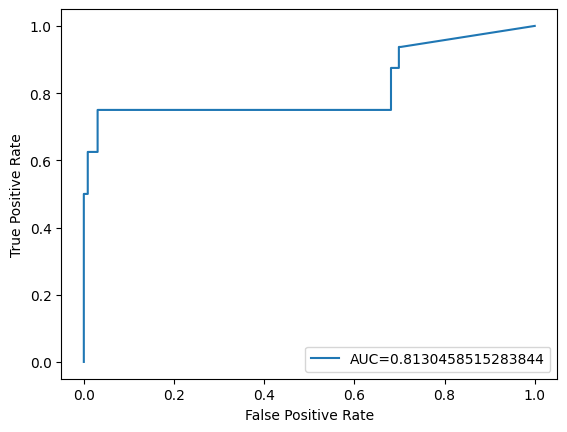

In [ ]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.8130458515283844


The  ROC curve, also known as Receiver Operating Characteristics Curve, is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model. The higher the AUC (Area Under The Curve), the better the performance of the model at distinguishing between the positive and negative classes. It is a better metric than accuracy score.

An AUC score of 0.97 suggests that 97% of our prdictions will be correct.

## Training with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [ ]:
model_pred = model.predict(X_test)

In [ ]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

##  Random Forest Model Evaluation

In [ ]:
#importing the methods
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [ ]:
# Print classification report using predictions
print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       229
         1.0       0.88      0.44      0.58        16

    accuracy                           0.96       245
   macro avg       0.92      0.72      0.78       245
weighted avg       0.96      0.96      0.95       245



In [ ]:
# Print confusion matrix using predictions
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),228,1
Actually Positive(1),9,7


In [ ]:
# Print confusion matrix using predictions in Context
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'],
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),228,1
Actually Fraud(1),9,7


In [ ]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9591836734693877


Our Random Forest Model indicates 93% accuracy

In [ ]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.419547193877551

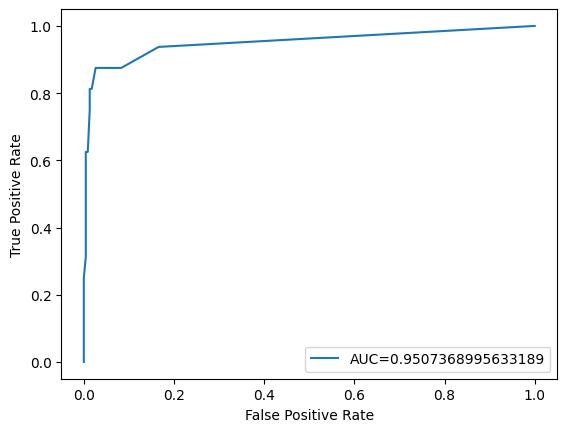

In [ ]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Print ROC_AUC score using probabilities
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.9507368995633189


An AUC score of 0.99 suggests that our Random Forest Model is almost perfect with 99% correct Predictions.